In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
import seaborn as sns
from __future__ import division

In [3]:
data = pd.DataFrame({'MPG':[22.3,22,23.7,24.2,25.5,21.1,20.6,24.0,26,23.1,24.8,20.2], 'Age':[3,4,3,2,1,5,4,1,1,2,2,5],'Gender':['M','F','F','M','F','M','M','M','F','M','F','M']})

In [4]:
data

,Age,Gender,MPG
0,3,M,22.3
1,4,F,22.0
2,3,F,23.7
3,2,M,24.2
4,1,F,25.5
5,5,M,21.1
6,4,M,20.6
7,1,M,24.0
8,1,F,26.0
9,2,M,23.1


# a) 

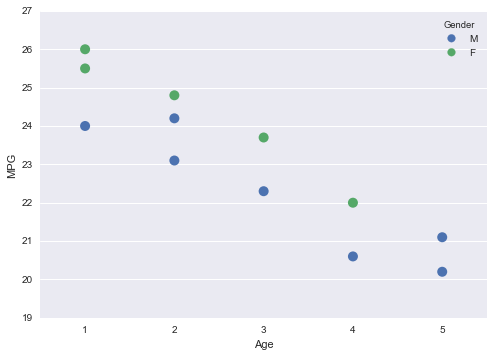

In [5]:
sns.swarmplot(x="Age", y="MPG", data=data, hue="Gender", size=10)

In [9]:
data

,Age,Gender,MPG,D1
0,3,M,22.3,1
1,4,F,22.0,0
2,3,F,23.7,0
3,2,M,24.2,1
4,1,F,25.5,0
5,5,M,21.1,1
6,4,M,20.6,1
7,1,M,24.0,1
8,1,F,26.0,0
9,2,M,23.1,1


# b)

# we have categorical variable 'Gender'. To fit the line we must create a dummy variable. since there are only 2 levels: M and F in Gender, we have to create only 1 dummy variable to represent the levels in Gender.

# So we will create a dummy variable called D1:{'M':1, 'F': 0}

In [8]:
data['D1'] = data['Gender'].replace({'F':0,'M':1})

In [11]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula='Age ~ D1', data=data).fit()
lm2.params

Intercept    2.200000
D1           0.942857
dtype: float64

# so we have Age = 2.2 + 0.943(D1)

# This indicates that Age of the car is 2.2 when there is a Female (since we have F = 0) and 2.2 + 0.943 when there is a Male

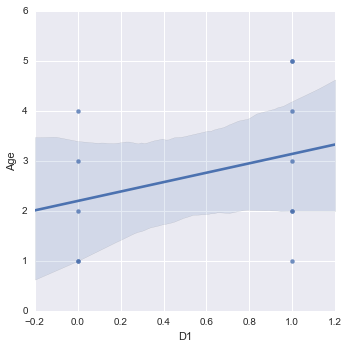

In [13]:
sns.lmplot('D1','Age',data=data,palette='winter')

# C)

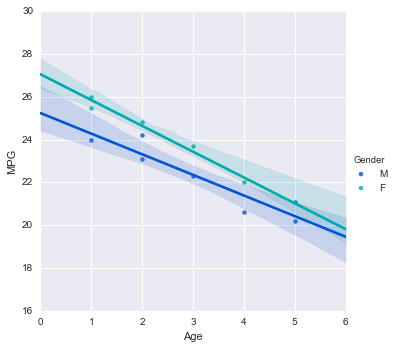

In [51]:
sns.lmplot('Age','MPG',hue='Gender',data=data,palette='winter')

# d)

In [53]:
lm_d = smf.ols(formula='MPG ~ Age', data=data).fit()
lm_d.params

Intercept    26.359794
Age          -1.176289
dtype: float64

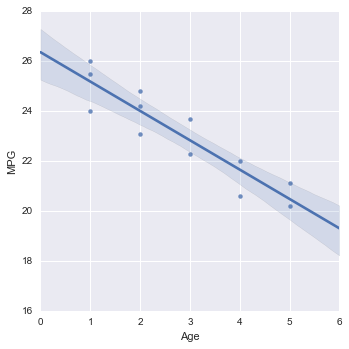

In [56]:
sns.lmplot('Age','MPG',data=data,palette='winter')

# e)

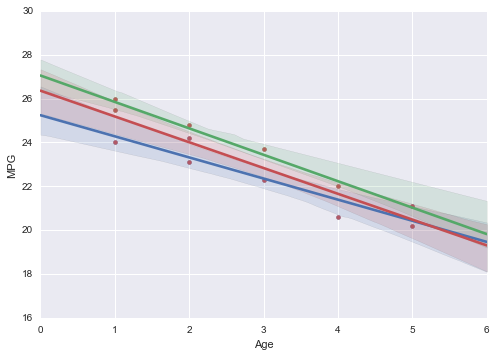

In [14]:
fig, ax =  plt.subplots()
sns.regplot('Age','MPG',data=data[data['Gender'] == 'M'],ax=ax, label='Male')
sns.regplot('Age','MPG',data=data[data['Gender'] == 'F'],ax=ax, label = 'Female')
sns.regplot('Age','MPG',data=data,ax=ax)

# YES.Three of the lines are looking approximately the same